# Simulations for DNA circuits with Python3
### Part II Perform the simulations
In this part, we will introduce the mathematical fundamentals of the simulative method, followed by the code implementation of the whole reaction.
#### 2.1 Modeling a basic second-order reaction
In fact, DNA circuits are always composed of DNA strand displacement, and DNA strand displacement can be represented by:

$$A + B \xrightarrow[]{k} C + D$$

It is observed by researchers that the DNA strand displacement is a kind of [second-order reaction](https://en.wikipedia.org/wiki/Second-order_reaction), where the rate may be proportional to one concentration squared $r = k[A]^2$, or (more commonly) to the product of two concentrations $r = k[A][B]$.

note: [X] stands for the concentration of X.

The curves of the second-order reaction may look like this (corresponding to the concentration of C in the reaction above, and the reaction occurs in step 100):

![](Figs/fig_2_1.png)

In this case, the rate equation is: $r = -\frac{dA}{dt} = -\frac{dB}{dt} = \frac{dC}{dt} = \frac{dD}{dt} = k[A][B]$

And at the same time, we have the mass balance equation:

$[A_0] - [A] = [B_0] - [B] = [C] = [D]$

where $[A_0]$, $[B_0]$ are the initial concentrations of A and B, respectively. For simplicity, we assume the initial concentrations of A and B are the same: 

$[A_0] = [B_0]$

Our goal is to obtain the relationship between the concentration of the product [C] and time t. So we have two methods to address the problem:


##### Integral method, analytic solutions
According to the mass balance equation, we can obtain the relationship between A and B:

$[B] = [A]$

then we have:

$\frac{dA}{dt} = -k[A]^2$

$-\frac{1}{[A]^2} dA = k dt$

$\frac{1}{[A]} = kt + C$

When t=0, $[A] = [A_0]$. Therefore, C = $\frac{1}{[A_0]}$.

$[A] = \frac{[A]_0}{kt[A_0] + 1}$

Let k = 10000 $M^{-1}step^{-1}$, $[A_0] = 1 \mu M$. We can plot the concentrations of A and C:

[  1.00000000e-06   6.66666667e-07   5.00000000e-07   4.00000000e-07
   3.33333333e-07   2.85714286e-07   2.50000000e-07   2.22222222e-07
   2.00000000e-07   1.81818182e-07]


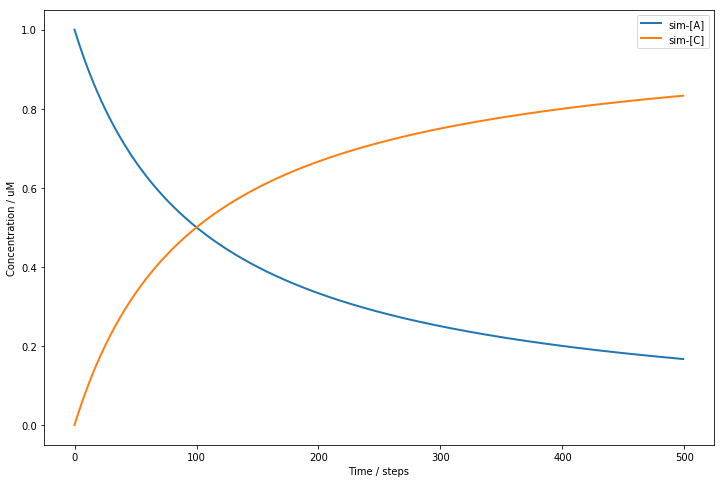

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_A(A0, k, t):
    return A0 / (k * t * A0 + 1)

A0 = 1e-6
k = 1e+4
t = np.linspace(0, 499, 500)
scale = 1e+6    #scale: uM

A = get_A(A0, k, t)

print(A[::50])    # print some values of [A]

plt.figure(figsize=(12,8))
plt.plot(t, A*scale, label='sim-[A]', color='C0', linewidth=2)
plt.plot(t, (A0 - A)*scale, label='sim-[C]', color='C1', linewidth=2)
plt.legend()
plt.xlabel('Time / steps')
plt.ylabel('Concentration / uM')
plt.show()

##### Iterative method, numerical solutions
Sometimes, the form of the integration is difficult to calculate, then the iterative method can be an alternative way to model the reaction.

At time t, the concentration of the reactant R can be represented as R(t). For reaction $A + B \xrightarrow[]{k} C + D$, at time t, the reaction rate can be calculated as $r = k \cdot A(t) \cdot B(t)$.

So at time t+1, we have:

$A(t+1) = A(t) - r = A(t) - k \cdot A(t) \cdot B(t)$

$B(t+1) = B(t) - r = B(t) - k \cdot A(t) \cdot B(t)$

$C(t+1) = C(t) + r = C(t) + k \cdot A(t) \cdot B(t)$

$D(t+1) = D(t) + r = D(t) + k \cdot A(t) \cdot B(t)$

And the initial conditions are: $A(0) = [A]_0$, $B(0) = [B]_0$, $C(0) = 0$, $D(0) = 0$.

We can create a function to calculate the concentrations of the reactants time series:

In [2]:
def calculate_concentrations(init, k, time=500):
    # declare the placeholders of concentrations
    A = np.linspace(0, 0, time)
    B = np.linspace(0, 0, time)
    C = np.linspace(0, 0, time)
    D = np.linspace(0, 0, time)
    
    # get the initial concentrations
    A[0], B[0], C[0], D[0] = init
    
    for t in range(1, time):
        rate = k * A[t-1] * B[t-1]
        A[t] = A[t-1] - rate
        B[t] = B[t-1] - rate
        C[t] = C[t-1] + rate
        D[t] = D[t-1] + rate
    
    return A, B, C, D

Let the parameters be the same as previous: k = 10000 $M^{-1}step^{-1}$, $[A_0] = 1 \mu M$. We can plot the concentrations of A and C:

[  1.00000000e-06   6.64849904e-07   4.98258162e-07   3.98528614e-07
   3.32109333e-07   2.84689433e-07   2.49132050e-07   2.21478372e-07
   1.99355404e-07   1.81253993e-07]


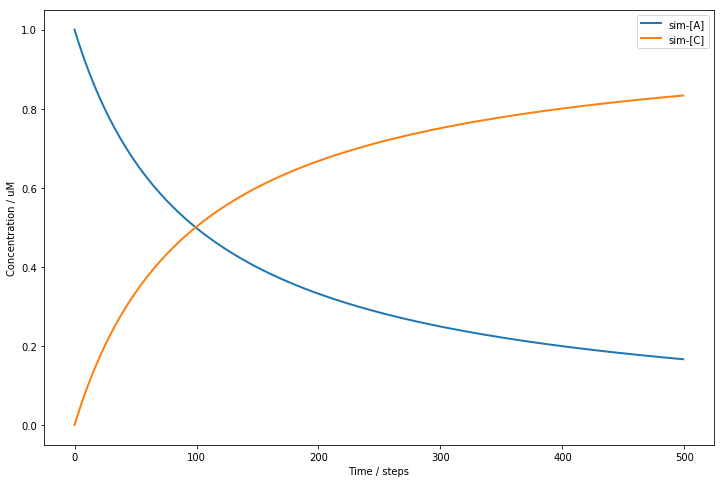

In [3]:
init = [1e-6, 1e-6, 0, 0]
k = 1e+4
t =np.linspace(0, 499, 500)
y = calculate_concentrations(init, k, t.shape[0])
scale = 1e+6    #scale: uM

print(y[0][::50])    # print some values of [A]

plt.figure(figsize=(12,8))
plt.plot(t, y[0]*scale, label='sim-[A]', color='C0', linewidth=2)
plt.plot(t, y[2]*scale, label='sim-[C]', color='C1', linewidth=2)
plt.legend()
plt.xlabel('Time / steps')
plt.ylabel('Concentration / uM')
plt.show()

We can see the numerical results are very close to the analytic results.

#### 2.2 Fitting the reaction rate constant $k$
In last section, we have established the model that describes the reaction, and in this section, we will fit the reaction rate constant $k$ to a proper value according to the experimental data.

According to the model in the last section, if the initial condition and the rate constant are given, the output of the model is determined. But in the process of fitting, the initial conditions of the concentrations of the reactants are always given, so only the rate constant $k$ is to be fitted. Our goal is to find a value for $k$ with which the curve of the model is closest to the experimental curve.

Firstly, we are going to find a function to measure the close degree between the experimental data and the output of the model. One naive method is to minimize the sum of the distances between the data points from the experiment and the model:

$F = \sum_{i=0}^{N} \vert p^i_e - p^i_m \vert$

where N means the number of experimental data points, $p^i_e$ means the i$^{th}$ data point in the experiment, $p^i_m$ means the i$^{th}$ data point calculated by the model.

However, it is always difficult to compute the absolute value function. As a result, we take the mean square error (MSE) instead:

$F = \sum_{i=0}^{N} (p^i_e - p^i_m)^2$

And the $p^i_m$ is a function related to time t, rate constant k and the initial conditions init: $p^i_m = f(t, k, init)$. By minimizing the loss function F, we can obtain the rate constant k that makes the outputs of the model be closest to the experimental data. Here we use *[scipy.optimize.leastsq](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.optimize.leastsq.html#scipy.optimize.leastsq)* to compute the minimum mean square error:
```python
scipy.optimize.leastsq(func, x0, args=(), Dfun=None, full_output=0, col_deriv=0, ftol=1.49012e-08, xtol=1.49012e-08, gtol=0.0, maxfev=0, epsfcn=None, factor=100, diag=None)
```

Minimize the sum of squares of a set of equations.

$x = \mathop{\arg\min}_{y} (sum(func(y)^2), axis=0)$

##### Parameters

**func : *callable*** Should take at least one (possibly length N vector) argument and returns M floating point numbers. It must not return NaNs or fitting might fail.

**x0 : *ndarray*** The starting estimate for the minimization.

**args : *tuple, optional*** Any extra arguments to func are placed in this tuple.

##### Returns

**x : *ndarray*** The solution (or the result of the last iteration for an unsuccessful call).

**cov_x : *ndarray*** Uses the fjac and ipvt optional outputs to construct an estimate of the jacobian around the solution. None if a singular matrix encountered (indicates very flat curvature in some direction). This matrix must be multiplied by the residual variance to get the covariance of the parameter estimates – see curve_fit.

**infodict : *dict*** a dictionary of optional outputs with the key s.

**mesg : *str*** A string message giving information about the cause of failure.

**ier : *int*** An integer flag. If it is equal to 1, 2, 3 or 4, the solution was found. Otherwise, the solution was not found. In either case, the optional output variable ‘mesg’ gives more information.

##### Examples

Here is an example where an error function is defined and minimized: 

Assume we have a data sequence:

S = [[0, 2.01], [1, 4.98], [2, 13.99], [4, 50.03], [5, 76.98], [6, 110.01]]

and a model:

$y = ax^2 + b$

Our goal is to find a pair of (a, b) that makes the output of the model be closest to the data sequence.

In [4]:
from scipy.optimize import leastsq

# define the function
def func(a, x, b):
    return a * np.power(x, 2) + b

# define the error function
def funcerror(p, y):
    return y - func(p[0], x, p[1])

x = np.array([0,1,2,4,5,6])
y = np.array([2.01,4.98,13.99,50.03,76.98,110.01])

p0 = (0,0)    # initial value for a and b

plsq = leastsq(funcerror, p0, args=(y))
print('a =',plsq[0][0],'\nb =',plsq[0][1])

a = 3.00026086943 
b = 1.9964347862


The result is $y = 3.0026086943x^2 + 1.9964347862$, we can plot the model and the data sequence:

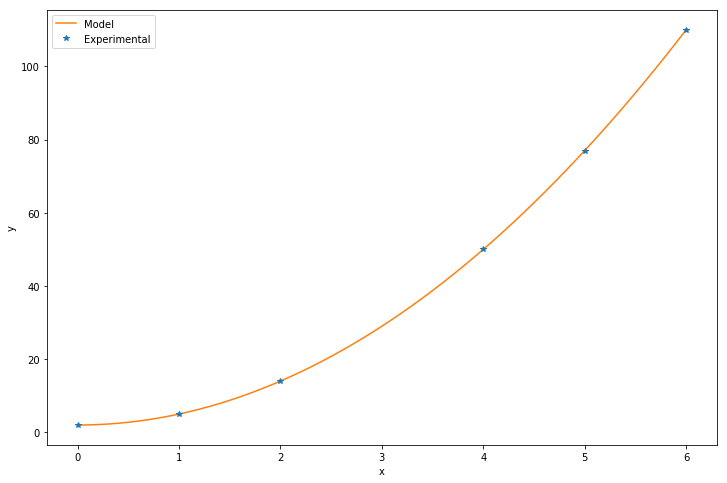

In [5]:
plt.figure(figsize=(12,8))
t = np.linspace(0, 6, 61)
plt.plot(t, func(3.00026086943, t, 1.9964347862),label='Model', color='C1')
plt.plot(x, y, '*', label='Experimental', color='C0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Another example is from [this paper](https://doi.org/10.1039%2Fc7nr06484e), where the reaction is modeled as: 

$$BC + n1 \xrightarrow[]{k_n} B1B2C + n1$$
$$B1B2C \xrightarrow[]{k_1} B1 + B2C$$
$$B2C + A \xrightarrow[]{k_2} AC + B2$$

As the fluorophore is on structure AC, only the change in the amount of AC leads to the change in fluorescent intensity. So we bulid the model that returns \[AC\]:

In [6]:
def calculate_ac(kn, k1, k2, init, time):
    
    # placeholders for the reactants
    n1 = 2e+5
    bc = np.linspace(0,0,time)
    b1 = np.linspace(0,0,time)
    b2c = np.linspace(0,0,time)
    b1b2c = np.linspace(0,0,time)
    ac = np.linspace(0,0,time)
    a = np.linspace(0,0,time)
    
    dbc = np.linspace(0,0,time)
    db1 = np.linspace(0,0,time)
    db2c = np.linspace(0,0,time)
    db1b2c = np.linspace(0,0,time)
    dac = np.linspace(0,0,time)
    da = np.linspace(0,0,time)
    
    bc[0], b1[0], b2c[0], b1b2c[0], ac[0], a[0] = init
    
    for n in range(time-1):
        dbc[n] = - kn*bc[n]*n1
        db1[n] = k1*b1b2c[n]
        db2c[n] = k1*b1b2c[n] - k2*b2c[n]*a[n]
        db1b2c[n] = kn*bc[n]*n1 - k1*b1b2c[n]
        dac[n] = k2*b2c[n]*a[n]
        da[n] = -k2*b2c[n]*a[n]
        
        bc[n+1] = bc[n] + dbc[n]
        b1[n+1] = b1[n] + db1[n]
        b2c[n+1] = b2c[n] + db2c[n]
        b1b2c[n+1] = b1b2c[n] + db1b2c[n]
        ac[n+1] = ac[n] + dac[n]
        a[n+1] = a[n] + da[n]
    
    return ac

Then define the error function:

In [7]:
def funcerror(p, y):
    return y - calculate_ac(p[0], p[1], p[2], init, time)

Set the parameters, load data and fit:

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars


[  4.80120383e-07   1.51814232e+00   1.85383788e+06]


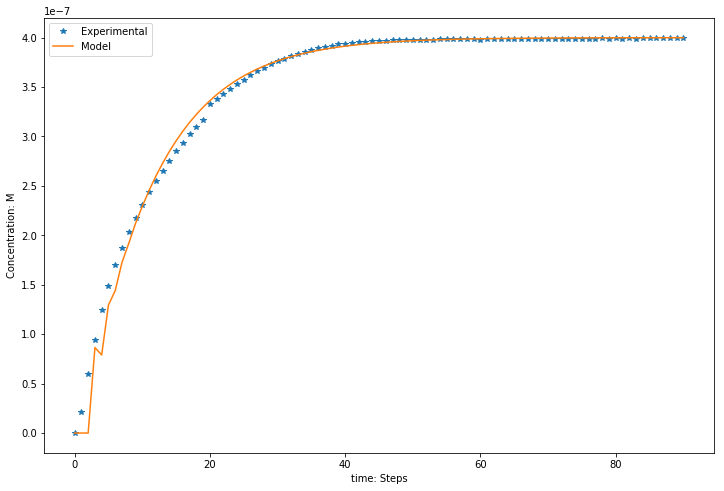

In [8]:
import pandas as pd

init = [400e-9, 0, 0, 0, 0, 800e-9]
y = np.asarray(pd.read_csv('Data/part2_1.csv').iloc[:]).reshape(-1)
time = y.shape[0]
p0 = [1e-7, 1, 1e+6]

p = leastsq(funcerror, p0, args=(y))[0]
print(p)

plt.figure(figsize=(12,8))
x = np.linspace(0, time-1, time)
plt.plot(x, y, '*', label='Experimental')
plt.plot(x, calculate_ac(p[0], p[1], p[2], init, time), label='Model')
plt.xlabel('time: Steps')
plt.ylabel('Concentration: M')
plt.legend()
plt.show()

You may notice that the values are diffenent from those in the paper. This is because the detection time interval was 3 minutes. When the values we obtain are divided by 180, they will be the same with those in the paper. 